In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("germany.csv")
data

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
0,1 FC Nuernberg,Bayern Muenchen,1945-11-04,2,1,F,germany,1 FC Nuernberg (Germany),Bayern Muenchen (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
1,1 FC Schweinfurt 05,Spvgg Greuther Fuerth,1945-11-04,0,0,F,germany,1 FC Schweinfurt 05 (Germany),Spvgg Greuther Fuerth (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
2,TSV Schwaben Augsburg,Stuttgarter Kickers,1945-11-04,2,2,F,germany,TSV Schwaben Augsburg (Germany),Stuttgarter Kickers (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
3,Vfb Stuttgart,Karlsruher FV,1945-11-04,3,1,F,germany,Vfb Stuttgart (Germany),Karlsruher FV (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
4,VFR Mannheim,Kickers Offenbach,1945-11-04,2,1,F,germany,VFR Mannheim (Germany),Kickers Offenbach (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28871,Werder Bremen,RB Leipzig,2019-05-18,2,1,F,germany,Werder Bremen (Germany),RB Leipzig (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
28872,SC Freiburg,1 FC Nuernberg,2019-05-18,5,1,F,germany,SC Freiburg (Germany),1 FC Nuernberg (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
28873,1 Fsv Mainz 05,1899 Hoffenheim,2019-05-18,4,2,F,germany,1 Fsv Mainz 05 (Germany),1899 Hoffenheim (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
28874,Vfl Wolfsburg,FC Augsburg,2019-05-18,8,1,F,germany,Vfl Wolfsburg (Germany),FC Augsburg (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national


In [7]:
data.describe()

,gh,ga
count,28876.000000,28876.000000
mean,2.026493,1.280025
std,1.603316,1.237953
min,0.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,16.000000,12.000000


In [8]:
data[data['gh'] == 16]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
11369,1 FC Kaiserslautern,SV 1911 Niederlahnstein,1963-01-21,16,0,F,germany,1 FC Kaiserslautern (Germany),SV 1911 Niederlahnstein (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national


In [9]:
data[data['gh'] == 12]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
600,Stuttgarter Kickers,Viktoria Aschaffenburg,1947-06-29,12,1,F,germany,Stuttgarter Kickers (Germany),Viktoria Aschaffenburg (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
6790,1 FC Kaiserslautern,Tus Koblenz,1957-04-28,12,6,F,germany,1 FC Kaiserslautern (Germany),Tus Koblenz (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
7374,Tura Ludwigshafen,SV St Ingbert,1958-01-26,12,2,F,germany,Tura Ludwigshafen (Germany),SV St Ingbert (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national
16255,Bor Moenchengladbach,Borussia Dortmund,1978-04-29,12,0,F,germany,Bor Moenchengladbach (Germany),Borussia Dortmund (Germany),germany,germany,DE,DE,Europe,Europe,Europe,national


In [10]:
home = data[(data['gh'] > data['ga'])]

home = home['home'].value_counts().rename_axis('Team').reset_index(name='points')

home["points"] = 3 * home["points"]

away = data[(data['ga'] > data['gh'])]

away = away['away'].value_counts().rename_axis('Team').reset_index(name='points')

away["points"] = 3 * away["points"]

drawdata = data[(data['ga'] == data['gh'])]

draw = drawdata[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='points')

home1 = home[home.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

draw1 = draw[draw.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

away1 = away.sort_values('Team').reset_index()

total = draw1['points'] + home1['points'] + away1['points']

aggregate = total.rename_axis('Team').reset_index(name='points')

aggregate['Team'] = home1['Team']

aggregate.sort_values(by='points', ascending = False).head(10)

,Team,points
16,Bor Moenchengladbach,3216.0
1,1 FC Koeln,3131.0
13,Bayer Leverkusen,3101.0
14,Bayern Muenchen,3027.0
0,1 FC Kaiserslautern,2915.0
17,Borussia Dortmund,2851.0
26,Eintracht Frankfurt,2483.0
2,1 FC Nuernberg,2452.0
35,FC Schalke 04,2444.0
113,Vfb Stuttgart,2173.0


<AxesSubplot:xlabel='Team'>

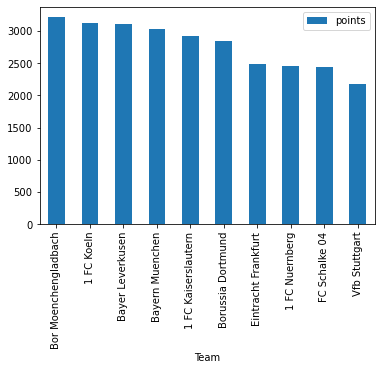

In [11]:
aggregate.sort_values(by='points', ascending = False).head(10).plot.bar(x='Team')

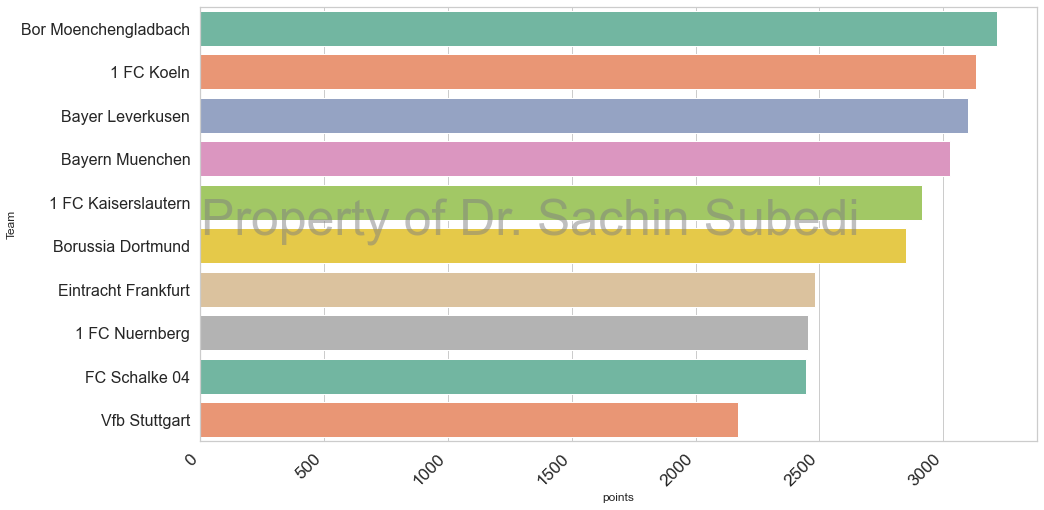

In [12]:
top = aggregate.sort_values(by='points', ascending = False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))

sns.barplot(data = top, x = 'points', y = 'Team', palette='Set2')

plt.xticks(

    rotation=45,

    horizontalalignment='right',

    fontweight='light',

    fontsize='x-large' 

)

plt.yticks(

    fontweight='light',

    fontsize='16' 

)

plt.text(3, 5, 'Property of Dr. Sachin Subedi',

         fontsize=50, color='gray',

       va='bottom', alpha=0.5)

plt.show()



In [13]:
data[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='counts')

,Team,counts
0,Vfb Stuttgart,2385
1,Bayern Muenchen,2372
2,Eintracht Frankfurt,2281
3,Borussia Dortmund,2268
4,FC Schalke 04,2225
...,...,...
125,FC Viktoria 1889 Berlin,12
126,SC Union 06 Berlin,7
127,Berliner SV 1892,3
128,VFL Neustadt Weinstrasse,2
